In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from scipy import stats

In [213]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

#create the dataframe
data = pd.DataFrame(boston.data)
data.columns = columns
data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# **Detect the Outliers:**

## **1. Box Plot and Scatter Plot:**

In [214]:
def Box_Plot(data, col):
  plt.figure(figsize=(12, 3))
  sns.boxplot(x = data[col])
  plt.show()


def Scatter_Plot(data, col1, col2):
  plt.figure(figsize=(15, 5))
  plt.scatter(x= data[col1], y=data[col2])
  plt.show()

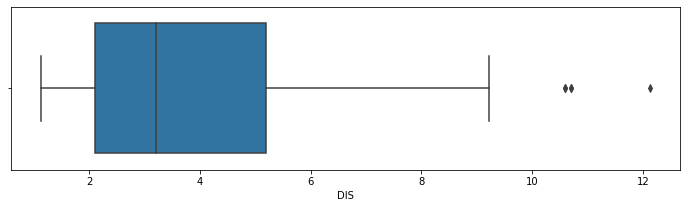

In [215]:
Box_Plot(data, 'DIS')

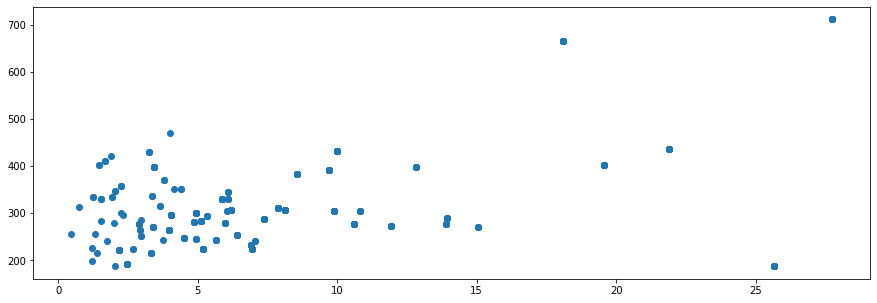

In [216]:
Scatter_Plot(data, 'INDUS', 'TAX')

## **2. Z-Score:**

In [217]:
# get the outliers for particular columns:
def Z_Score_col(data, col, threshold):
  z = np.abs(stats.zscore(data[col]))

  # get those index where z score is greater then threshold value
  # if z-score is greater than threshold value, then it is called a outliers.
  outliers_index = np.where(pd.DataFrame(z) > threshold)
  print(outliers_index)


In [218]:
Z_Score_col(data, 'DIS', 3)

(array([351, 352, 353, 354, 355]), array([0, 0, 0, 0, 0]))


## **3. IQR Method:**

In [219]:
def IQR_Method(data, col):
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  IQR = q3 - q1
  return IQR, q1, q3

def Get_Outliers_Index(data, col):
  IQR, q1, q3 = IQR_Method(data, col)
  lower = q1 - 1.5 * IQR
  upper = q3 + 1.5 * IQR
  
  lower_index = np.where(pd.DataFrame(data[col]) < lower)
  upper_index = np.where(pd.DataFrame(data[col]) > upper)

  print(f"upper_index: {upper_index} \n lower_index: {lower_index}")

In [220]:
# IQR, q1, q3 = IQR_Method(data, 'DIS')
Get_Outliers_Index(data, 'DIS')

upper_index: (array([351, 352, 353, 354, 355]), array([0, 0, 0, 0, 0])) 
 lower_index: (array([], dtype=int64), array([], dtype=int64))


# **Handle or Remove The Outliers:**

## **1. Z-Score:**

In [231]:
def Handle_with_Z_Score(data, col, threshold):
  z = np.abs(stats.zscore(data[col]))
  outliers_index = np.where(pd.DataFrame(z) > threshold)[0]
  not_outliers_index = np.where(pd.DataFrame(z) < threshold)[0]

  new_data = pd.DataFrame(data[col]).iloc[not_outliers_index]
  return new_data
  

In [251]:
new_data = Handle_with_Z_Score(data, 'DIS', 3)
print(f"Original Data Shape: {data.shape}")
print(f"After handle the outliers, the Newly Data Shape: {new_data.shape}") # look into columns only

Original Data Shape: (506, 13)
After handle the outliers, the Newly Data Shape: (501, 1)


## **2. IQR-Method:**

In [244]:
def Handle_with_IQR_Method(data, col):
  IQR, q1, q3 = IQR_Method(data, col)
  lower = q1 - 1.5 * IQR
  upper = q3 + 1.5 * IQR
  
  new_data = pd.DataFrame(data[col])
  new_data.loc[data[col] >= upper, col] = upper
  new_data.loc[data[col] >= lower, col] = lower
  return new_data


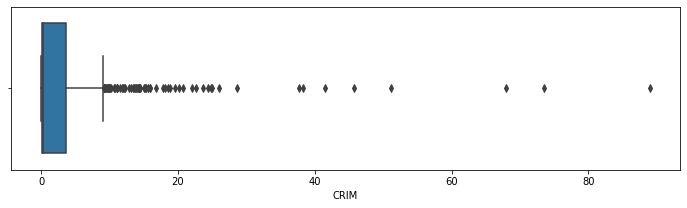

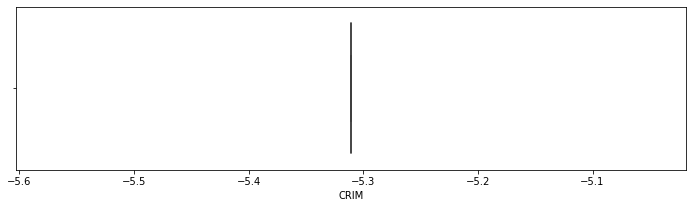

In [250]:
new_data = Handle_with_IQR_Method(data, 'CRIM')
Box_Plot(data, 'CRIM')
Box_Plot(new_data, 'CRIM')